# **Description**<br>
This is EDA of Haberman's data. The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.<br>

This dataset has been taken from Kaggle[(Haberman's Survival Data)](https://www.kaggle.com/gilsousa/habermans-survival-data-set).<br>

**Objective:** In this expedition we will visualize and apply statistical analysis in order to find insights about relationship(s) between attributes and the classes which will help us to present some logics to to distinguish the two classes.

**About Dataset** (As per Kaggle): 

1. Sources: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999
2. Relevant Information: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
3. Number of Attributes: 4 (including the class attribute)
4. Attribute Information:</br>
 * Age of patient at time of operation (numerical)
 * Patient's year of operation (year - 1900, numerical)
 * Number of positive axillary nodes detected (numerical)
 * Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year


In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [111]:
df=pd.read_csv('/content/drive/MyDrive/haberman.csv')

In [112]:
print(df.shape)
df.columns

(306, 4)


Index(['age', 'year', 'nodes', 'status'], dtype='object')



*   The shape of our dataset is (306, 4); meaning we have 306 rows and 4 columns.
*   Namely, the 4 columns are age, year, nodes, and status.



In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


*    None of the attributes contain Null value, each column's data type is int64.

**Univariate Analysis**

**Patient's age**

In [114]:
df['age'].describe()

count    306.000000
mean      52.457516
std       10.803452
min       30.000000
25%       44.000000
50%       52.000000
75%       60.750000
max       83.000000
Name: age, dtype: float64

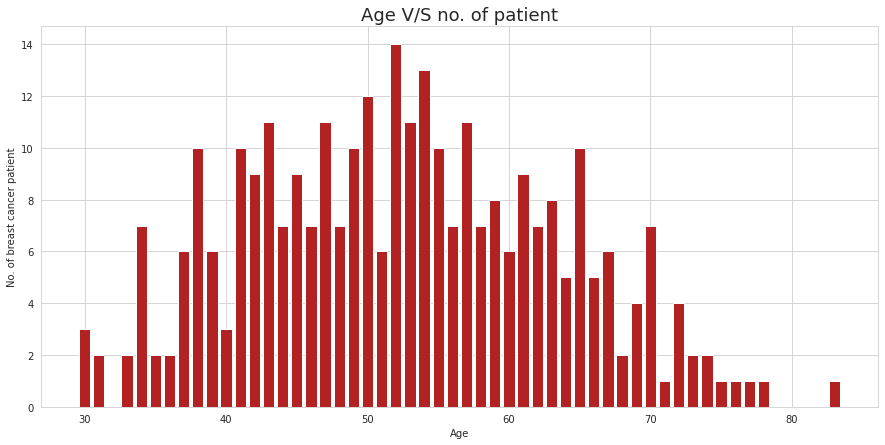

In [215]:
var=df["age"].value_counts()
plt.figure(figsize=(15,7))
plt.bar(var.index,df["age"].value_counts(),color='firebrick')
plt.xlabel("Age")
plt.ylabel('No. of breast cancer patient')
plt.title('Age V/S no. of patient',fontsize=18)
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Age Distribution Plot')

<Figure size 1080x504 with 0 Axes>

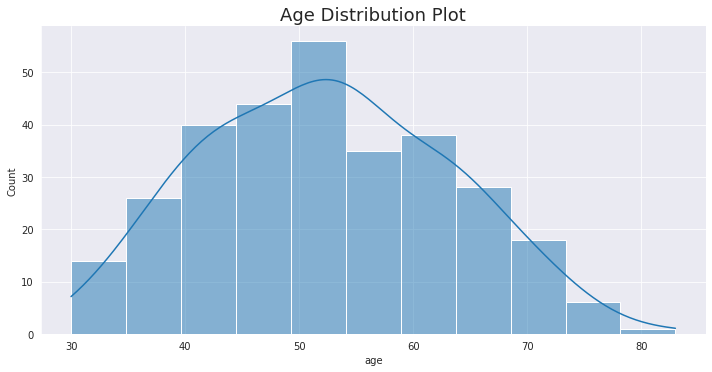

In [217]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,7))
sns.displot(df["age"],kde=True,aspect=2)
plt.title('Age Distribution Plot', fontsize=18)


* From above two graphs we can conclude that highest no. of patients are in the age group 50-55 years.
* This plot has only one maxima.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


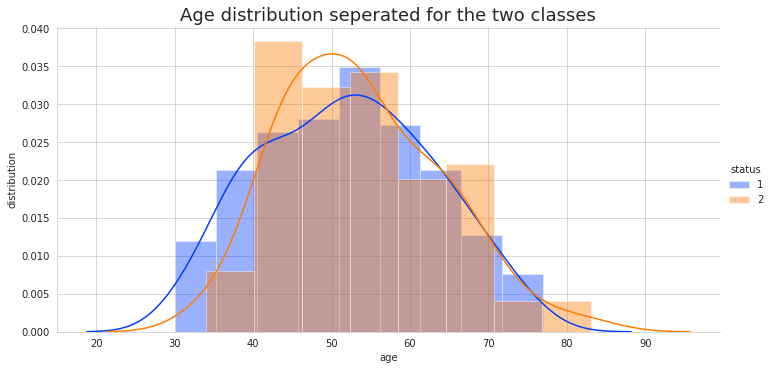

In [212]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="status",palette="bright",aspect=2,height=5).map(sns.distplot,"age").add_legend()
plt.title("Age distribution seperated for the two classes",fontsize=18)
plt.xlabel("age")
plt.ylabel("distribution")
plt.show()

* The graph is normally distributed, but the survival status classes are overlapping to a higher extent and making it hard to distinguish.
* There are only few regions where the classes are not mixed:</br>
</t> Age group **30-34** seems to have survived more than 5 years after treatment.
</t> Patients above the age of **77 or 78** died within 5 years of treatment.

**No. of positive Auxillary Nodes**

In [118]:
df["nodes"].describe()

count    306.000000
mean       4.026144
std        7.189654
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max       52.000000
Name: nodes, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Probability density of nodes')

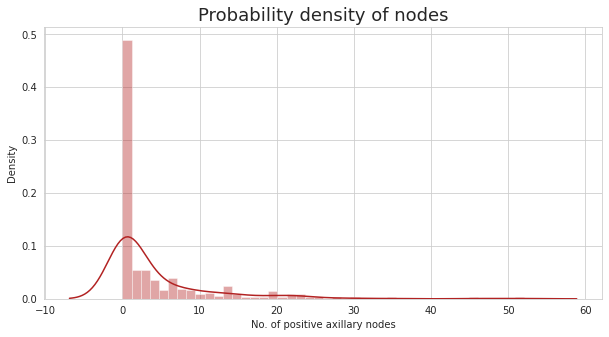

In [209]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
sns.distplot(df["nodes"],kde=True,color='firebrick')
plt.xlabel("No. of positive axillary nodes")
plt.ylabel("Density")
plt.title("Probability density of nodes",fontsize=18)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of no. nodes for each Survival status')

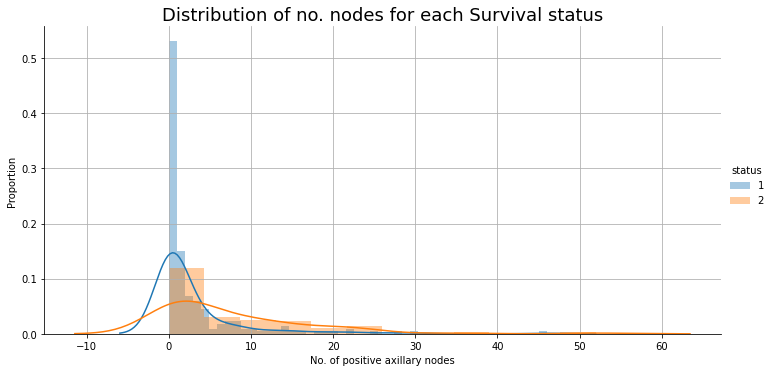

In [120]:
sns.FacetGrid(df,hue="status",height=5,aspect=2).map(sns.distplot,"nodes").add_legend()
plt.grid()
plt.xlabel("No. of positive axillary nodes")
plt.ylabel("Proportion")
plt.title("Distribution of no. nodes for each Survival status",fontsize=18)

* Patients with 0 auxillary nodes have highest chances of surviving more than 5 years.
* Above two graphs are highly **Right-skewed**.

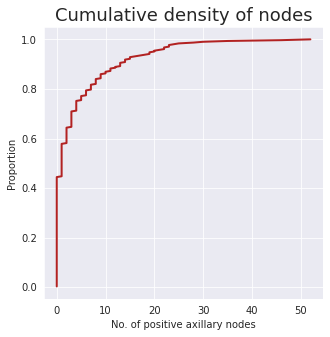

In [219]:
x=np.sort(df["nodes"])
y=np.arange(1,len(df["nodes"])+1)/len(df["nodes"])
plt.figure(figsize=(5,5))
plt.plot(x,y,color='firebrick',linewidth=2)
plt.grid(True)
plt.xlabel("No. of positive axillary nodes")
plt.ylabel("Proportion")
plt.title("Cumulative density of nodes",fontsize=18)
plt.show()

* Nearly 90% of the patients have 10 or less auxillary nodes.


**Year of operation**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(9.157109375000005, 0.5, 'Proportion')

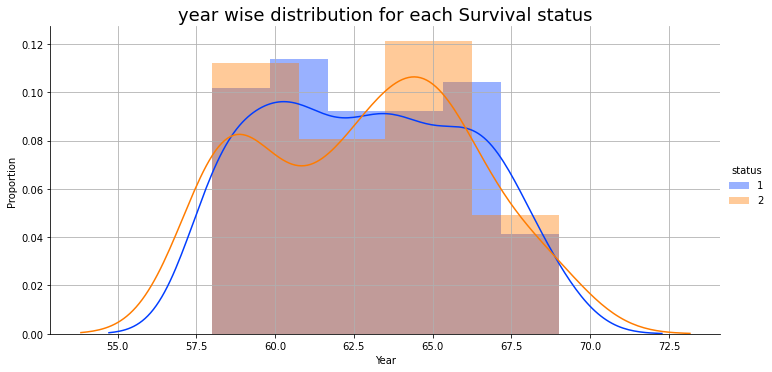

In [122]:
sns.FacetGrid(df,hue='status',height=5,aspect=2,palette="bright").map(sns.distplot,"year").add_legend()
plt.grid()
plt.title("year wise distribution for each Survival status",fontsize=18)
plt.xlabel("Year")
plt.ylabel("Proportion")

* Year 1962 had most no. of patients survied more than 5 years.
* Year distribution appears normal but again survival status classes are overlapping to a higher extent and making it hard to distinguish.
* Graph of Status=2 looks like bimodal whereas status=1 is multimodal.

**Survival Status**

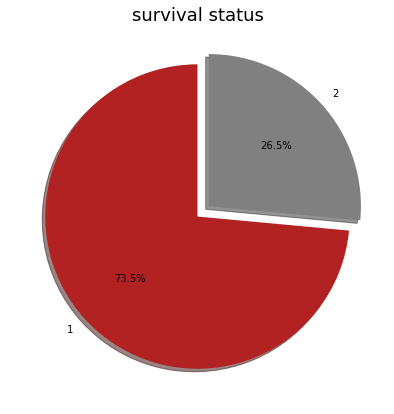

1    225
2     81
Name: status, dtype: int64

In [160]:
plt.figure(figsize=(10,7))
labels = 1,2
sizes = df.status.value_counts()
explode = (0,0.1)  

plt.pie(sizes, explode=explode, labels=labels,shadow=True, startangle=90,autopct='%1.1f%%',colors=("firebrick","gray"))
plt.title("survival status",fontsize=18)
plt.show()

df.status.value_counts()

* 73.5% patients survived more than 5 years.

**Bivariate analysis**

In [124]:
print("Desciption of age for status = 1\n")
df[df.status==1].age.describe()

Desciption of age for status = 1



count    225.000000
mean      52.017778
std       11.012154
min       30.000000
25%       43.000000
50%       52.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [125]:
print("Desciption of age for status = 2\n")
df[df.status==2].age.describe()

Desciption of age for status = 2



count    81.000000
mean     53.679012
std      10.167137
min      34.000000
25%      46.000000
50%      53.000000
75%      61.000000
max      83.000000
Name: age, dtype: float64

In [126]:
df["lesser than 5 nodes"]=df.nodes<5

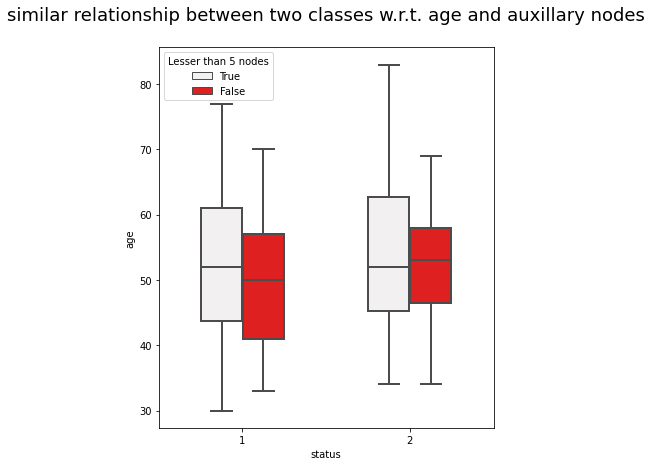

In [127]:
plt.figure(figsize=(6,7))
sns.boxplot(x="status",y="age",hue="lesser than 5 nodes",data=df,hue_order=[True,False],color="Red",width=0.5,linewidth=2)
plt.title("similar relationship between two classes w.r.t. age and auxillary nodes\n",fontsize=18)
plt.legend(title="Lesser than 5 nodes",loc=2)

* Both the status classes have median and mean age ranging between 50-54 years and average age for ***menopause*** lies in this range as well. 
* IQR for both the status classes lies in the range 41-63 years, and again this is the age range(includig the outliers) when menopause happens.
* Anyone below 34 years age has always survivied more than 5 years.
* Everyone above 77 years age never survived lesses than 5 years.

Text(0.5, 1.0, 'Outliers in both the status classes\n')

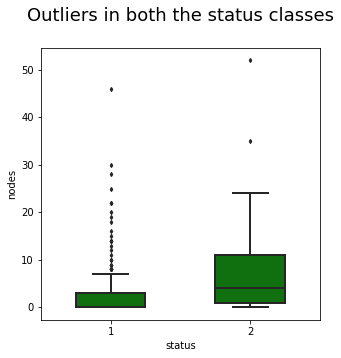

In [128]:
plt.figure(figsize=(5,5))
sns.boxplot(x="status",y="nodes",data=df,fliersize=3,color="green",linewidth=2,width=0.5)
plt.title("Outliers in both the status classes\n", fontsize=18)

* We can clearly see that there are so many outliers in status=1, which makes it harder to differently relate the status classes with no. of auxillary nodes.

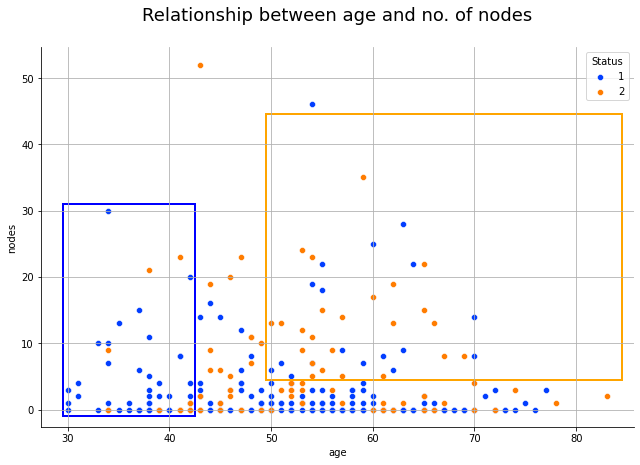

In [156]:
from matplotlib.patches import Rectangle
sns.FacetGrid(df,hue="status",height=6,aspect=1.5,palette="bright").map(sns.scatterplot,"age","nodes")
plt.grid()
plt.legend(title="Status")
plt.title("Relationship between age and no. of nodes\n", fontsize=18)


currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((29.5, -1), 13, 32,fill=False,color='blue',linewidth=2))
currentAxis.add_patch(Rectangle((49.5, 4.5), 35, 40,fill=False,color='orange',linewidth=2))


* 'age'<43 and 'no. of nodes'<=30 have higher chances of surviving more than 5 years.
* 'age'>50 and 'no. of nodes'>6  have lesser chances of surviving more than 5 years.

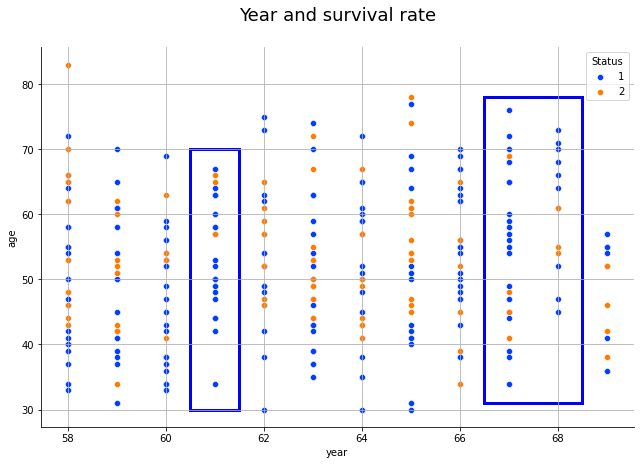

In [191]:
sns.FacetGrid(df,hue="status",height=6,aspect=1.5,palette="bright").map(sns.scatterplot,"year","age")
plt.grid()
plt.legend(title="Status")
plt.title("Year and survival rate\n", fontsize=18)

currentAxis = plt.gca()
currentAxis.add_patch(Rectangle((60.5, 30), 1, 40,fill=False,color='blue',linewidth=3))
currentAxis.add_patch(Rectangle((66.5, 31), 2, 47,fill=False,color='blue',linewidth=3))


* Years 61,67 and 68 appear to have highest 5yrs+ survival rates.

In [204]:
from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
    sns.pairplot(df, hue="status",height=height,aspect=aspect,vars=['year','age','nodes'], diag_kind = 'kde',palette="bright")
interactive(size_widget, height=(1, 3.5, 0.5), aspect=(0.5, 2, 0.25))



interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

* From the above pairplot our aim was to find some correlation between the attributes. However the plots are distributed in a way that they are not linearly seperable.

**Conclusion:**
* Given dataset is consists of two survival classes and their data points are highly overlapping making them impossible to distinguish. There seems no way to write accurate if-else statement in order to distinguish them.

* Anyone below 34 years age has always survivied more than 5 years after treatment. Which means younger patients have higher chances to survive more.

* Irrespective of the survival status it appears that women in their menopause are more prone to breast cancer. Since overall IQR of the patients' age appears 41-63 years, and menopause happens to most women in this age range.

* 73.5% patients survived for more than 5 years.

* Nearly 90% of the patients have 10 or less positive auxillary nodes.


